In [1]:
# from https://www.rdkit.org/docs/Cookbook.html

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVG
IPythonConsole.drawOptions.addStereoAnnotation = True

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

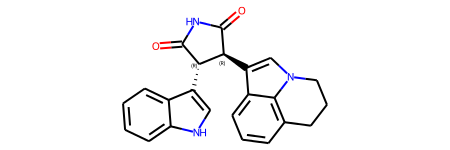

In [3]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

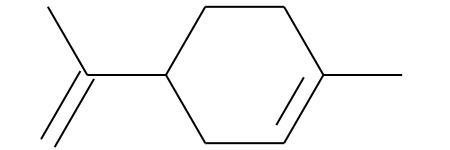

In [4]:
limonene = Chem.MolFromSmiles("CC1=CCC(CC1)C(=C)C")
limonene

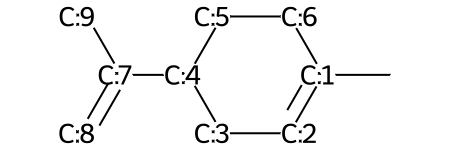

In [5]:
mol_with_atom_index(limonene)

In [7]:
from rdkit.Chem import Descriptors

In [8]:
d = Descriptors.FpDensityMorgan1(limonene)
mm = Descriptors.MolWt(limonene)
em = Descriptors.ExactMolWt(limonene)
print(d, mm, em)

1.7 136.238 136.125200512


In [9]:
from rdkit.Chem import rdMolHash
molhashf = rdMolHash.HashFunction.names
print(molhashf)


{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph, 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph, 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles, 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold, 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko, 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula, 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts, 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector, 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer, 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer, 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer, 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair, 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer, 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge, 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR, 'SmallWorldIndexBRL': r

In [42]:
rdMolHash.MolHash(limonene, rdMolHash.HashFunction.MolFormula)

'C10H16'

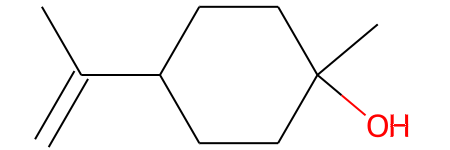

In [10]:
beta_terpineol = Chem.MolFromSmiles("OC1(CCC(CC1)C(C)=C)C")
beta_terpineol

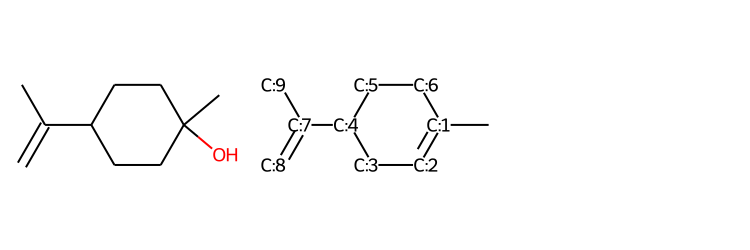

In [11]:
from rdkit.Chem import rdFMCS
mols = [beta_terpineol,limonene]
res=rdFMCS.FindMCS(mols)
Draw.MolsToGridImage(mols, subImgSize=(250,250))


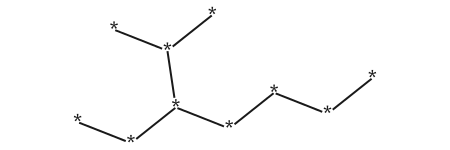

In [12]:
res.queryMol

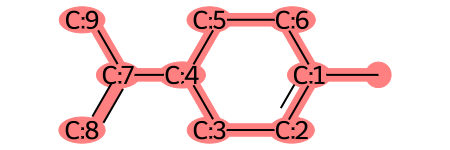

In [13]:
limonene.GetSubstructMatches(res.queryMol)
limonene

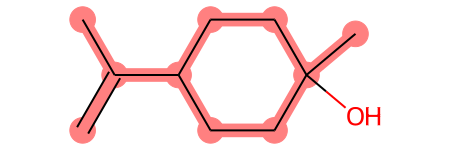

In [14]:
beta_terpineol.GetSubstructMatches(res.queryMol)
beta_terpineol